<a href="https://colab.research.google.com/github/Leila828/instadeep_labs/blob/master/Copy_of_Build_a_predictive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a predictive model





In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
cd /content/drive/My\ Drive/ML-Level2

/content/drive/My Drive/ML-Level2


In [ ]:
ls

'Copy of survey-results-public.csv'  'Copy of survey-results-schema.csv'


In [ ]:
# Import required libraries and read test and train data set. Append both.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./Copy of survey-results-public.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,...,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,...,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Several times,Several times,Once or twice,Somewhat agree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Satisfied,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,I have created a CV or Developer Story on Stac...,8.0,Desktop; iOS browser; iOS app; Android browser...,Several times,Several times,Once or twice,Once or twice,Once or twice,Haven't done at all,Several times,At least once each week,Disagree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,20 or more years,20 or more years,NaN,Other,NaN,NaN,NaN,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Agree,Somewhat agree,Disagree,Disagree,Agree,...,Very satisfied,A lot of influence,Some influence,Some influence,Some influence,A lot of influence,Some influence,Some i

## Features
In the dataset, we found that there is a number of factors that should be able to help us better understand an individual's salary.

The features can be splitted into: 

Categorical | Quantitive
--- | ---
Country | Number of hours
Compagny size | Job Satisfaction
Education | Career satisfaction

Now, we will look for a way to take all these inputs and predict an individual salary.


#### Question 1

**1.** Take a look at the summary statistics associated to the dataset

In [ ]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


#### Question 2

**2.** Build a heatmap on this dataset using the seaborn library.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fef5b7a20>,
      dtype=object)

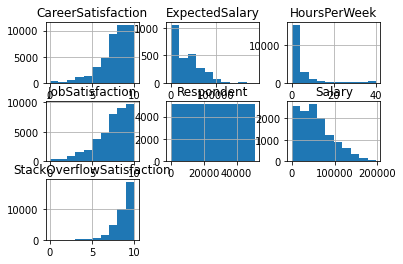

In [ ]:
df.hist()

In [ ]:
df.corr()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
Respondent,1.000000,-0.015348,-0.016278,0.023430,0.037309,-0.026780,-0.009201
CareerSatisfaction,-0.015348,1.000000,0.645803,-0.067544,0.155679,0.158223,0.003346
JobSatisfaction,-0.016278,0.645803,1.000000,-0.081532,0.087871,0.120765,NaN
HoursPerWeek,0.023430,-0.067544,-0.081532,1.000000,-0.011730,-0.120114,-0.064397
StackOverflowSatisfaction,0.037309,0.155679,0.087871,-0.011730,1.000000,-0.076674,-0.021426
Salary,-0.026780,0.158223,0.120765,-0.120114,-0.076674,1.000000,NaN
ExpectedSalary,-0.009201,0.003346,NaN,-0.064397,-0.021426,NaN,1.000000


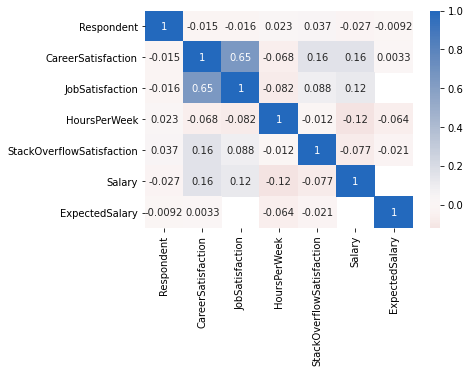

In [ ]:
sns.heatmap(df.corr(), annot=True , cmap='vlag_r',center=0)

#### Question 3

**3.** Identify the:


*   Calegorical variables
*   Numerical variables
*   Target Variable


In [ ]:
df.select_dtypes(include ='float64')

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
0,NaN,NaN,0.0,9.0,NaN,NaN
1,NaN,NaN,NaN,8.0,NaN,37500.0
2,8.0,9.0,NaN,8.0,113750.0,NaN
3,6.0,3.0,5.0,10.0,NaN,NaN
4,6.0,8.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
51387,7.0,3.0,5.0,9.0,58000.0,NaN
51388,NaN,NaN,NaN,7.0,NaN,NaN
51389,10.0,10.0,NaN,NaN,NaN,NaN
51390,6.0,7.0,1.0,9.0,40000.0,NaN


In [ ]:
cat_vars = df.select_dtypes(include =['object']).columns # specify the list of the categorical variables
num_vars = df.select_dtypes(include =['float','int']).columns # specify the list of the numerical variables
y = df["Salary"] # target variable

## Data cleaning
Perform to obtain the correct X and y objects
This function cleans df using the following steps to produce X and y:

1. Drop all the rows with no salaries
2. Create X as all the columns that are not the Salary column
3. Create y as the Salary column
4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
5. For each numeric variable in X, fill the column with the mean value of the column.
6. Create dummy columns for all the categorical variables in X, drop the original columns

In [ ]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'],axis=0)
    y = df["Salary"]
    
    #Drop respondent and expected salary columns
    df = df.drop(["Respondent","ExpectedSalary","Salary"],axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include =['float','int']).columns
    for col in num_vars:
        df[col].fillna(df[col].mean(),inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include =['object']).columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df= pd.concat([df.drop(var,axis=1),pd.get_dummies(data=df[var] , prefix=var, prefix_sep='_',columns=["Country"], drop_first=True)],axis=1)
      
    #df = ___
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)
X.head()    

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,"ProgramHobby_Yes, I contribute to open source projects","ProgramHobby_Yes, I program as a hobby","ProgramHobby_Yes, both",Country_Albania,Country_Anguilla,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaidjan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Bermuda,Country_Bolivia,Country_Bosnia-Herzegovina,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Cambodia,Country_Canada,Country_Cayman Islands,Country_Chile,Country_China,Country_Colombia,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_Dominican Republic,Country_Ecuador,Country_Egypt,...,"Race_Hispanic or Latino/Latina; Native American, Pacific Islander, or Indigenous Australian; South Asian; White or of European descent","Race_Hispanic or Latino/Latina; Native American, Pacific Islander, or Indigenous Australian; White or of European descent",Race_Hispanic or Latino/Latina; South Asian,Race_Hispanic or Latino/Latina; South Asian; White or of European descent,Race_Hispanic or Latino/Latina; White or of European descent,Race_Hispanic or Latino/Latina; White or of European descent; I don’t know,Race_I don’t know,Race_I don’t know; I prefer not to say,Race_I prefer not to say,Race_Middle Eastern,Race_Middle Eastern; I don’t know,Race_Middle Eastern; South Asian,Race_Middle Eastern; White or of European descent,Race_Middle Eastern; White or of European descent; I don’t know,Race_Middle Eastern; White or of European descent; I don’t know; I prefer not to say,"Race_Native American, Pacific Islander, or Indigenous Australian","Race_Native American, Pacific Islander, or Indigenous Australian; I don’t know","Race_Native American, Pacific Islander, or Indigenous Australian; White or of European descent",Race_South Asian,Race_South Asian; White or of European descent,Race_White or of European descent,Race_White or of European descent; I don’t know,Race_White or of European descent; I don’t know; I prefer not to say,Race_White or of European descent; I prefer not to say,SurveyLong_Disagree,SurveyLong_Somewhat agree,SurveyLong_Strongly agree,SurveyLong_Strongly disagree,QuestionsInteresting_Disagree,QuestionsInteresting_Somewhat agree,QuestionsInteresting_Strongly agree,QuestionsInteresting_Strongly disagree,QuestionsConfusing_Disagree,QuestionsConfusing_Somewhat agree,QuestionsConfusing_Strongly agree,QuestionsConfusing_Strongly disagree,InterestedAnswers_Disagree,InterestedAnswers_Somewhat agree,InterestedAnswers_Strongly agree,InterestedAnswers_Strongly disagree
2,8.0,9.0,2.64292,8.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
14,8.0,8.0,2.64292,8.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17,9.0,8.0,2.64292,8.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
18,5.0,3.0,2.64292,8.511858,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,8.0,9.0,2.64292,8.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0


## Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
print(X_train.shape, X_test.shape)

(9023, 21107) (3868, 21107)


## Fit and predict

In [ ]:
# instantiate the model
lm_model = LinearRegression(normalize=True)
# fit the model
lm_model.fit(X_train,y_train)
# predict test data
pred=lm_model.predict(X_test)
# score your model on the test
print("The mse error: ", mean_squared_error(y_test,pred))
print("test r2_score: ", r2_score(pred,y_test))

The mse error:  2485913780.5936084
test r2_score:  0.2180546784910723


In [ ]:
# Let's see the training score
train_pred = r2_score(lm_model.predict(X_train),y_train)
print("train r2_score: ", train_pred)

train r2_score:  1.0


## Summary
In order to understand how well our model fit the dataset, we first needed to split our data into `X_train and y_train`.  

Then we were able to fit our `linear model` on the `training data`.  

We could then predict using our `test data`  by providing it to the linear model to make predictions.  


By looking at the `train score`, it looked like we were doing awesome because 
it was 1!  However, looking at the `test score` suggested our model was not extending well.  The purpose of this notebook will be to see how well we can get our model to extend to new data.
            
This problem where our data fits the training data well, but does not perform well on test data is commonly known as `Overfitting`

## Next steps
The next steps are to improve our model. Feel free to test using what we have learned in enhancing your model's results to avoid overfitting and generalizing on the test data.